In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [85]:
raw_df = pd.read_csv(r"Machine-Learning-with-R-datasets-master\weatherAUS.csv")
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [86]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [87]:
raw_df.dropna(subset=["RainTomorrow", "RainToday"], inplace=True)
raw_df.shape

(140787, 23)

#### EDA

In [88]:
raw_df["RainTomorrow"].unique()
output_color = {
    "No": "#1f77b4",
    "Yes": "#FFA500"
}


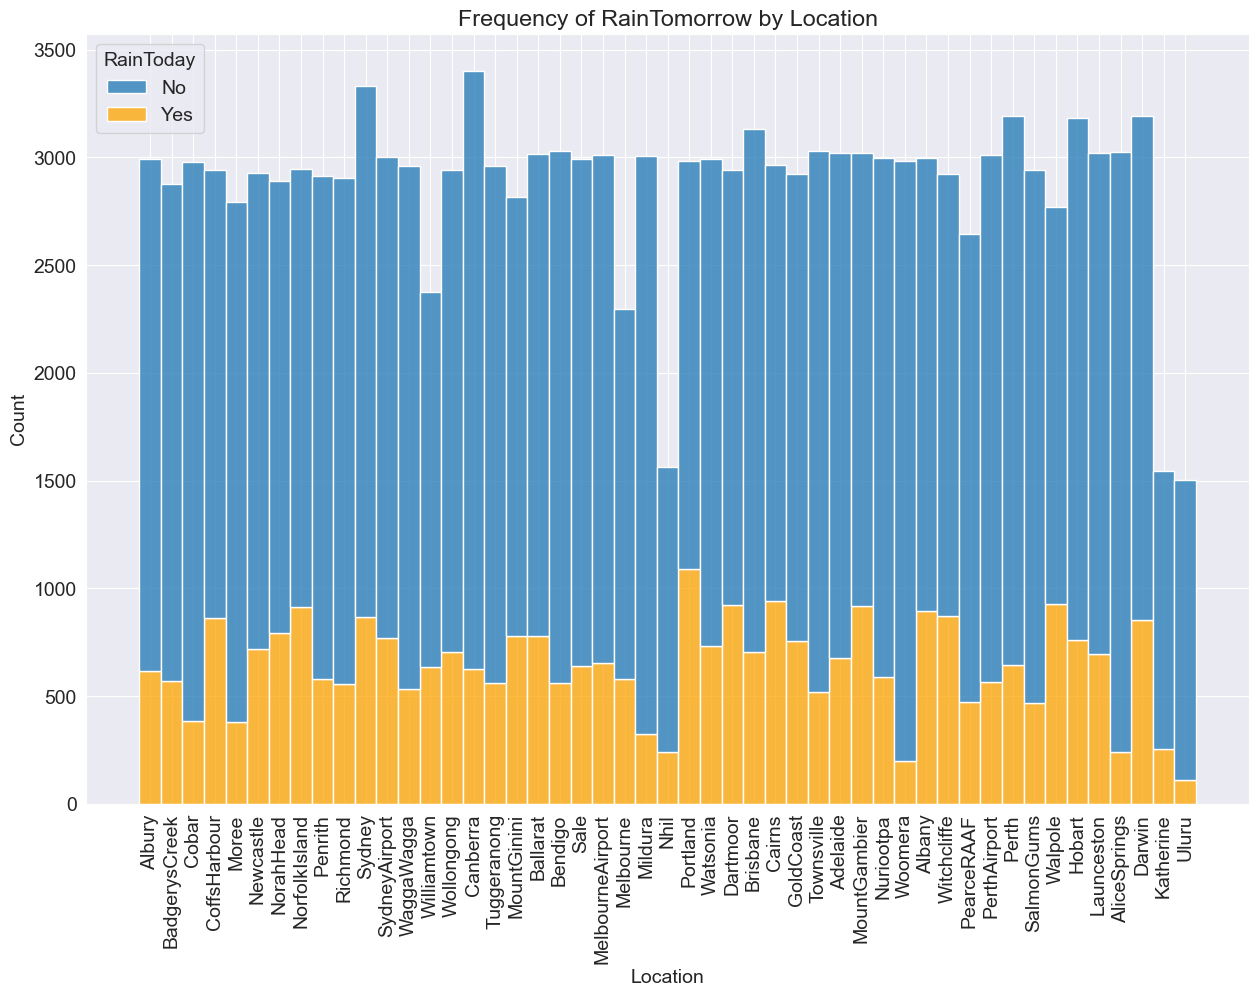

In [89]:
plt.figure(figsize=(15, 10))
sns.histplot(data=raw_df, x='Location', hue='RainToday', palette=output_color, multiple='stack')
plt.xticks(rotation=90)
plt.title('Frequency of RainTomorrow by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

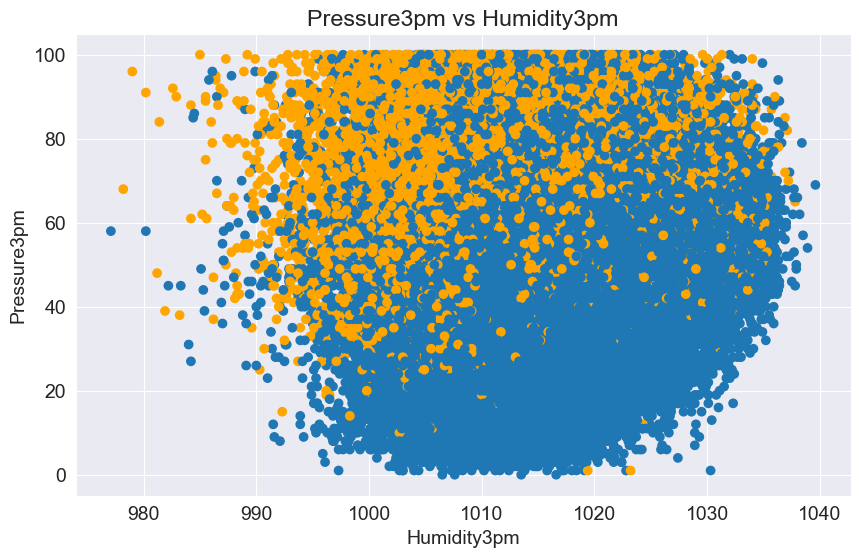

In [90]:
plt.scatter(raw_df["Pressure3pm"], raw_df["Humidity3pm"], c=raw_df["RainToday"].apply(lambda x: output_color[x]))
plt.xlabel("Humidity3pm")
plt.ylabel("Pressure3pm")
plt.title("Pressure3pm vs Humidity3pm")
plt.show()

In [91]:
plot = px.histogram(
    raw_df,
    x="Evaporation",
    title="Evaporation vs Rainy Days",
    color="RainToday",
)
plot.show()

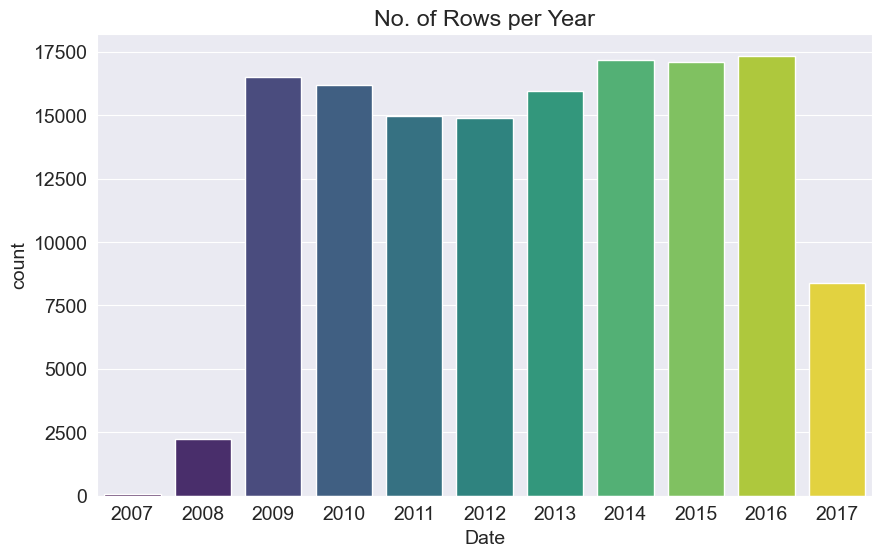

In [92]:
plt.title("No. of Rows per Year")
sns.countplot(x=pd.to_datetime(raw_df["Date"]).dt.year, hue=pd.to_datetime(raw_df["Date"]).dt.year,palette="viridis", legend=False)
plt.show()

In [93]:
year = pd.to_datetime(raw_df["Date"]).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [94]:
print("train_df shape:", train_df.shape)
print("val_df shape:", val_df.shape)
print("test_df shape:", test_df.shape)

train_df shape: (97988, 23)
val_df shape: (17089, 23)
test_df shape: (25710, 23)


In [95]:
input_cols = raw_df.columns[1:-1]
output_col = 'RainTomorrow'

In [96]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[output_col]

val_inputs = val_df[input_cols].copy()
val_target = val_df[output_col]

test_inputs = test_df[input_cols].copy()
test_target = test_df[output_col]

In [97]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [98]:
numeric_cols, categorical_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [99]:
raw_df[numeric_cols].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736015,0.104255,0.467147,0.073078,0.177927,0.175775,0.175835,-0.234441,0.005686,-0.451414,-0.462099,0.077367,0.020268,0.901828,0.708716
MaxTemp,0.736015,1.000000,-0.074839,0.588934,0.470221,0.068510,0.014468,0.051178,-0.506109,-0.509916,-0.331831,-0.427069,-0.290217,-0.279261,0.887038,0.984565
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178
Evaporation,0.467147,0.588934,-0.064549,1.000000,0.366659,0.203396,0.194398,0.129166,-0.506055,-0.393149,-0.269850,-0.293098,-0.185211,-0.184395,0.545382,0.574311
Sunshine,0.073078,0.470221,-0.227525,0.366659,1.000000,-0.032196,0.009188,0.056480,-0.492784,-0.629638,0.041071,-0.020276,-0.675846,-0.704621,0.291364,0.490386
WindGustSpeed,0.177927,0.068510,0.133497,0.203396,-0.032196,1.000000,0.604513,0.686881,-0.215117,-0.026631,-0.457710,-0.412879,0.071186,0.109340,0.150574,0.033511
WindSpeed9am,0.175775,0.014468,0.086816,0.194398,0.009188,0.604513,1.000000,0.519980,-0.270564,-0.031638,-0.227540,-0.174497,0.024111,0.053369,0.129108,0.004878
WindSpeed3pm,0.175835,0.051178,0.057759,0.129166,0.056480,0.686881,0.519980,1.000000,-0.145967,0.016011,-0.295207,-0.254951,0.052370,0.024769,0.163972,0.028845
Humidity9am,-0.234441,-0.506109,0.223725,-0.506055,-0.492784,-0.215117,-0.270564,-0.145967,1.000000,0.668002,0.138916,0.186515,0.452298,0.358273,-0.473305,-0.500528
Humidity3pm,0.005686,-0.509916,0.255312,-0.393149,-0.629638,-0.026631,-0.031638,0.016011,0.668002,1.000000,-0.028127,0.051244,0.517394,0.523186,-0.222227,-0.558562


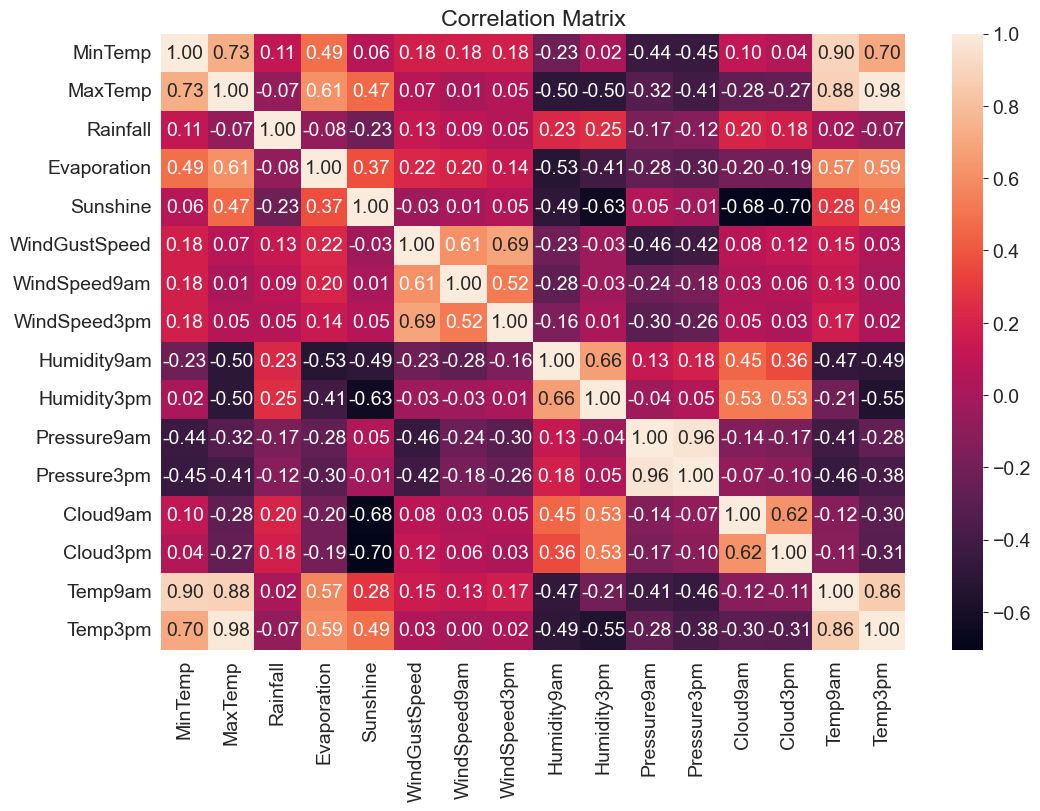

In [100]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[numeric_cols].corr(), annot=True , fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [101]:
##### IMPUTATION #####
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(train_inputs[numeric_cols])



SimpleImputer()

In [102]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [103]:
train_inputs[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [104]:
#### SCALING ####
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_inputs[numeric_cols])


MinMaxScaler()

In [105]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [106]:
val_inputs.describe().loc[['mean', 'std', 'min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
mean,0.488161,0.528782,0.005756,0.068210,0.536624,0.260504,0.158845,0.212078,0.681324,0.504527,0.635207,0.618422,0.490257,0.496123,0.498898,0.527041
std,0.154319,0.143156,0.022310,0.040461,0.179276,0.097928,0.099512,0.099315,0.197919,0.207213,0.111121,0.110850,0.255846,0.237193,0.147900,0.140183
min,0.007075,0.017241,0.000000,0.000000,0.000000,0.007752,0.000000,0.000000,0.040000,0.000000,0.125620,0.052805,0.000000,0.000000,-0.006508,0.021484
max,0.952830,0.948276,0.666307,0.854369,1.013986,1.000000,1.000000,0.850575,1.000000,1.000000,0.971901,0.962046,0.888889,0.888889,0.941432,0.935547


In [116]:
from sklearn.preprocessing import OneHotEncoder

train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')

print(train_inputs[categorical_cols].isna().sum())

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


In [122]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(train_inputs[categorical_cols])

In [124]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [125]:
print(categorical_cols, encoded_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'] ['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', '

In [126]:
transformed = encoder.transform(train_inputs[categorical_cols])
print("Transformed shape:", transformed.shape)
print("Expected shape:", len(encoded_cols))


Transformed shape: (97988, 102)
Expected shape: 102


In [127]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\mehul\AppData\Local\Temp\ipykernel_26448\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\mehul\AppData\Local\Temp\ipykernel_26448\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\mehul\AppData\Local\Temp\ipykernel_26448\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [128]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [129]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [130]:
%%time
model.fit(X_train, train_target)

CPU times: total: 781 ms
Wall time: 3.06 s


DecisionTreeClassifier(random_state=42)

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [132]:
train_preds = model.predict(X_train)

In [133]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [134]:
pd.value_counts(train_preds)

C:\Users\mehul\AppData\Local\Temp\ipykernel_26448\1258350197.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



No     76192
Yes    21796
Name: count, dtype: int64

In [135]:
train_probs = model.predict_proba(X_train)

In [139]:
accuracy_score(train_target, train_preds)

0.9999795893374699

In [141]:
model.score(X_val, val_target)

0.7935514073380537

In [142]:
val_target.value_counts() / len(val_target)

RainTomorrow
No     0.790626
Yes    0.209374
Name: count, dtype: float64

In [143]:
from sklearn.tree import plot_tree, export_text

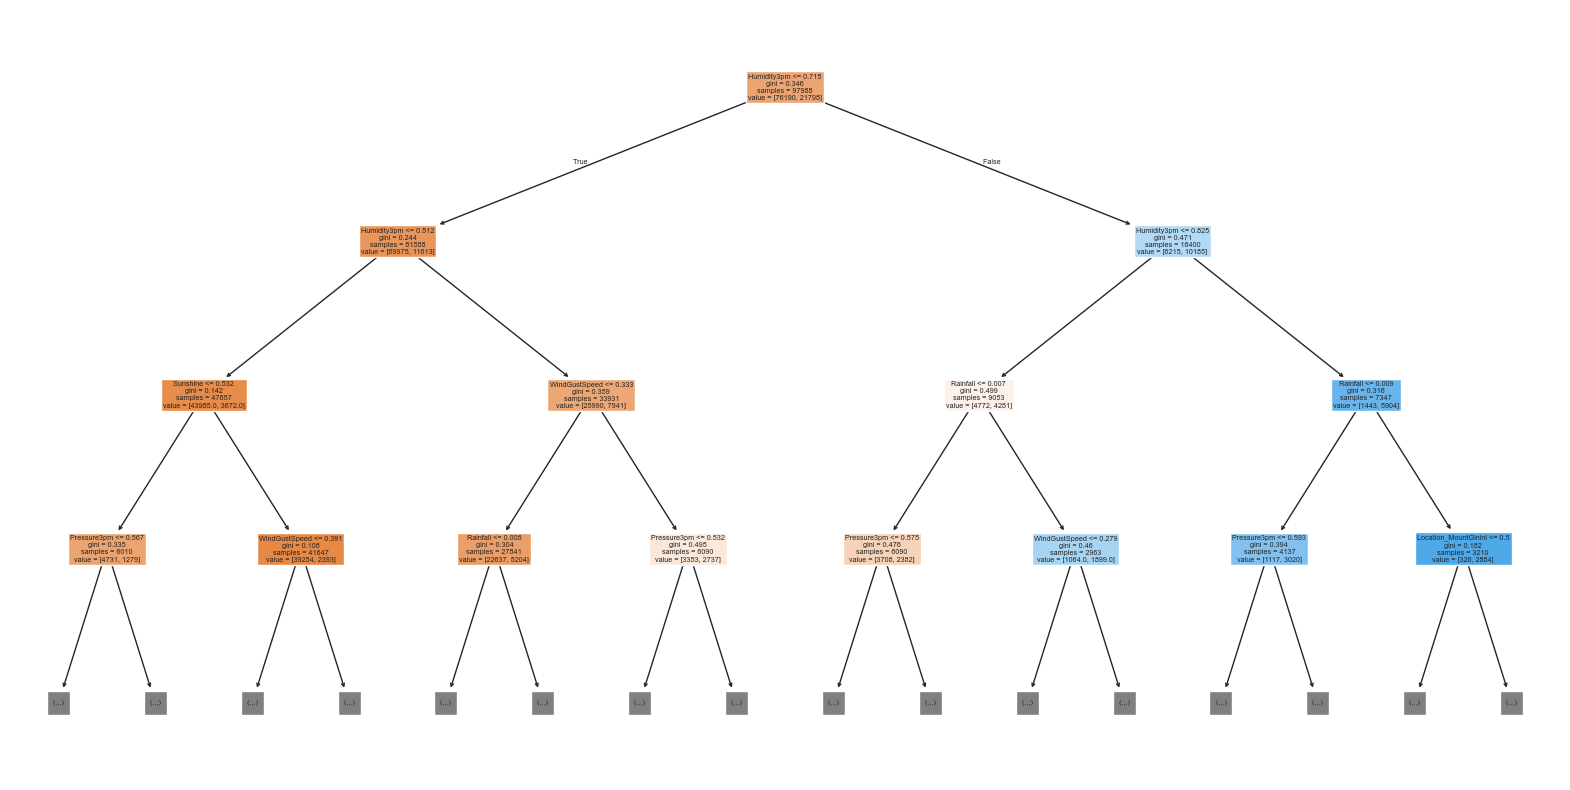

In [149]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True)
plt.show()